## EJERCICIO ESTRUCTURA DATAFRAME - TEMPERATURA MESES

In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Crear Dataframe
tabla = pd.DataFrame([('Enero', 31, 'inv', 2, 4),('Febrero', 28, 'inv', 3, 2),('Marzo', 31, 'inv', 7, 5),
                  ('Abril', 30, 'pri', 7, 9),('Mayo', 31, 'pri', 9, 10),('Junio', 30, 'pri', 15, 14),
                  ('Julio', 31, 'ver', 20, 24),('Agosto', 31, 'ver', 27, 26),('Septiembre', 30, 'ver', 25, 18),
                  ('Octubre', 31, 'oto', 20, 14),('Noviembre', 30, 'oto', 11, 10),('Diciembre', 31, 'oto', 6, 7),], 
                columns=['Mes', 'Días', 'Estación', 'Temp.2021', 'Temp.2022'],   
                index=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

In [11]:
tabla

,Mes,Días,Estación,Temp.2021,Temp.2022
Ene,Enero,31,inv,2,4
Feb,Febrero,28,inv,3,2
Mar,Marzo,31,inv,7,5
Abr,Abril,30,pri,7,9
May,Mayo,31,pri,9,10
Jun,Junio,30,pri,15,14
Jul,Julio,31,ver,20,24
Ago,Agosto,31,ver,27,26
Sep,Septiembre,30,ver,25,18
Oct,Octubre,31,oto,20,14


In [4]:
# Muestra los valores de la tabla
tabla.values

array([['Enero', 31, 'inv', 2, 4],
       ['Febrero', 28, 'inv', 3, 2],
       ['Marzo', 31, 'inv', 7, 5],
       ['Abril', 30, 'pri', 7, 9],
       ['Mayo', 31, 'pri', 9, 10],
       ['Junio', 30, 'pri', 15, 14],
       ['Julio', 31, 'ver', 20, 24],
       ['Agosto', 31, 'ver', 27, 26],
       ['Septiembre', 30, 'ver', 25, 18],
       ['Octubre', 31, 'oto', 20, 14],
       ['Noviembre', 30, 'oto', 11, 10],
       ['Diciembre', 31, 'oto', 6, 7]], dtype=object)

In [5]:
# Muestra las etiquetas de sus índices
tabla.index

Index(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct',
       'Nov', 'Dic'],
      dtype='object')

In [6]:
# Muestra los nombres de sus columnas
tabla.columns

Index(['Mes', 'Días', 'Estación', 'Temp.2021', 'Temp.2022'], dtype='object')

In [7]:
# Muestra los datos de la columna Mes con dos comandos diferentes
tabla['Mes']

Ene         Enero
Feb       Febrero
Mar         Marzo
Abr         Abril
May          Mayo
Jun         Junio
Jul         Julio
Ago        Agosto
Sep    Septiembre
Oct       Octubre
Nov     Noviembre
Dic     Diciembre
Name: Mes, dtype: object

In [8]:
tabla.Mes

Ene         Enero
Feb       Febrero
Mar         Marzo
Abr         Abril
May          Mayo
Jun         Junio
Jul         Julio
Ago        Agosto
Sep    Septiembre
Oct       Octubre
Nov     Noviembre
Dic     Diciembre
Name: Mes, dtype: object

In [14]:
# Seleccionar solo columnas numéricas
tabla_numerica = tabla.select_dtypes(include=['number'])

# Calcular la correlación
tabla_numerica.corr()

,Días,Temp.2021,Temp.2022
Días,1.000000,0.256108,0.349989
Temp.2021,0.256108,1.000000,0.928141
Temp.2022,0.349989,0.928141,1.000000


In [15]:
# Calcular la covarianza
tabla_numerica.cov()

,Días,Temp.2021,Temp.2022
Días,0.810606,1.969697,2.401515
Temp.2021,1.969697,72.969697,60.424242
Temp.2022,2.401515,60.424242,58.083333


Text(510.3244949494949, 0.5, 'Temp.2022')

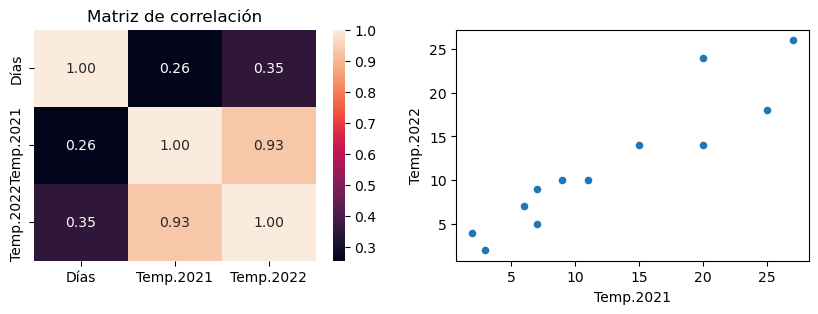

In [21]:
# Ver la tabla de correlación con mapa de color
import matplotlib.pyplot as plt
import seaborn as sns

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.heatmap(tabla_numerica.corr(), ax=ax1, vmax=1, square=False, annot=True, fmt='.2f')
ax1.set_title('Matriz de correlación')
tabla_numerica.plot(ax=ax2, kind='scatter', x='Temp.2021', y='Temp.2022')
plt.xlabel('Temp.2021')
plt.ylabel('Temp.2022')

In [22]:
# Definir filtro1 (cuando la Estación sea oto)
filtro1 = tabla['Estación'] == 'oto'
# Definir fitro2 (cuando la Temp.2021 sea mayor a 10 grados)
filtro2 = tabla['Temp.2021'] > 10

In [23]:
# Meses de otoño con más de 10 grados en 2021
meses_otoño_calidos = tabla[filtro1 & filtro2]

In [24]:
meses_otoño_calidos

,Mes,Días,Estación,Temp.2021,Temp.2022
Oct,Octubre,31,oto,20,14
Nov,Noviembre,30,oto,11,10


In [25]:
# Meses de otoño y los meses con más de 10 grados en 2021
meses_otoño_o_calidos = tabla[filtro1 | filtro2]

In [26]:
meses_otoño_o_calidos

,Mes,Días,Estación,Temp.2021,Temp.2022
Jun,Junio,30,pri,15,14
Jul,Julio,31,ver,20,24
Ago,Agosto,31,ver,27,26
Sep,Septiembre,30,ver,25,18
Oct,Octubre,31,oto,20,14
Nov,Noviembre,30,oto,11,10
Dic,Diciembre,31,oto,6,7


In [27]:
# Generar y representar una serie con las temperaturas de 2021 y 2022
temp = pd.concat([tabla['Temp.2021'], tabla['Temp.2022']], axis=0)
temp = temp.apply(lambda val: float(val))

In [28]:
temp

Ene     2.0
Feb     3.0
Mar     7.0
Abr     7.0
May     9.0
Jun    15.0
Jul    20.0
Ago    27.0
Sep    25.0
Oct    20.0
Nov    11.0
Dic     6.0
Ene     4.0
Feb     2.0
Mar     5.0
Abr     9.0
May    10.0
Jun    14.0
Jul    24.0
Ago    26.0
Sep    18.0
Oct    14.0
Nov    10.0
Dic     7.0
dtype: float64

<Axes: title={'center': 'temperaturas'}>

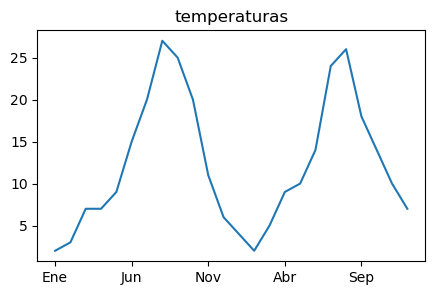

In [29]:
# Graficar la serie
figura, ax = plt.subplots(1,1, figsize=(5,3))
temp.plot(ax = ax, title = 'temperaturas')

In [30]:
# Completar las líneas de código en else 
def filtro_media(serie):
    valores = serie.values
    new_valores = valores.copy()
    for i in range(len(valores)):
        if i < 3 or i > len(valores) - 4:
            new_valores[i] = np.nan
        else:
            # # Añade una línea de código para calcular la media conlos valores vecinos. Calcula la media de los valores vecinos (3 anteriores, actual, y 3 posteriores)
            new_valores[i] = np.mean(valores[i-3:i+4])  

    new_serie = pd.Series(new_valores, index=serie.index)
    return new_serie

def filtro_diferencia(serie):
    valores = serie.values
    new_valores = valores.copy()
    for i in range(len(valores)):
        if i < 1:  # No hay un valor anterior para calcular la diferencia
            new_valores[i] = np.nan
        else:
            # Añade una línea de código para calcular la diferencia de cada valor con el anterior. Calcula la diferencia entre el valor actual y el anterior
            new_valores[i] = valores[i] - valores[i-1]
            
    new_serie = pd.Series(new_valores, index=serie.index)
    return new_serie

In [31]:
tendencia = filtro_media(temp)
cambios = filtro_diferencia(temp)

<Axes: title={'center': 'cambios de temperaturas'}>

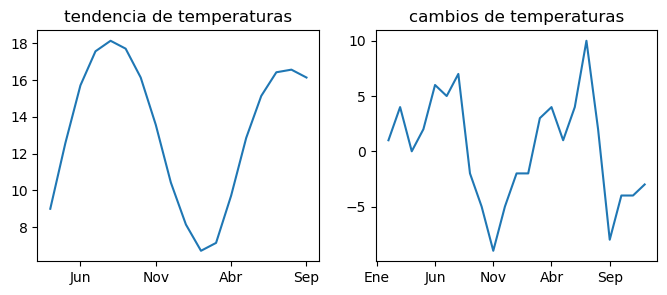

In [32]:
figura, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
tendencia.plot(ax = ax1, title='tendencia de temperaturas')
cambios.plot(ax = ax2, title='cambios de temperaturas')

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [34]:
# Normalizar la serie temp

# Estandarizar los valores de temp
# Fórmula manual (Z-score)
media_temp = temp.mean()
std_temp = temp.std()
temp_estandarizada_formula = (temp - media_temp) / std_temp

In [35]:
# Estandarizar los valores de temp
# Usando StandardScaler (scikit-learn)
scaler_standard = StandardScaler()
temp_estandarizada_sklearn = scaler_standard.fit_transform(temp.values.reshape(-1, 1)).flatten()

In [36]:
# Escalar los valores de temp al rango [0, 1]
# Fórmula manual
min_temp = temp.min()
max_temp = temp.max()
temp_escalada_formula = (temp - min_temp) / (max_temp - min_temp)

In [37]:
# Escalar los valores de temp al rango [0, 1]
# Usando MinMaxScaler (scikit-learn)
scaler_minmax = MinMaxScaler()
temp_escalada_sklearn = scaler_minmax.fit_transform(temp.values.reshape(-1, 1)).flatten()

In [38]:
# Calcular la temperatura media en cada estación en 2022
media_por_estacion = tabla.groupby('Estación')['Temp.2022'].mean()

In [39]:
media_por_estacion

Estación
inv     3.666667
oto    10.333333
pri    11.000000
ver    22.666667
Name: Temp.2022, dtype: float64